<a href="https://colab.research.google.com/github/TrongHvDev/AI/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# from keras.models import Sequential
# from keras.layers import Dense
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import *
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.saving.legacy.save import load_model
from keras.datasets import mnist



In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

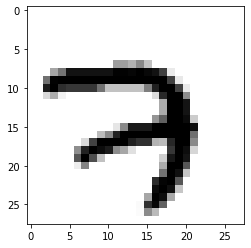

so nay la 7


In [14]:
hinh = train_images[5000]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show()
print('so nay la',train_labels[5000])

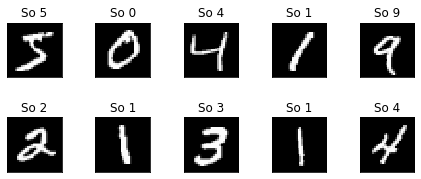

In [4]:
for i in range(10):
  plt.subplot(3, 5, i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray', interpolation = 'none')
  plt.title('So {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [15]:
model = Sequential()
model.add(Dense(512,input_shape = (28*28,), activation='relu', name = "Layer_1"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               401920    
                                                                 
 Output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [17]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy', test_acc)
print('test loss', test_loss)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.2652 - accuracy: 0.9235
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1097 - accuracy: 0.9673
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0713 - accuracy: 0.9797
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0510 - accuracy: 0.9845
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0384 - accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0291 - accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0222 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0168 - accuracy: 0.9956
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0128 - accuracy: 0.9967
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9

In [18]:
score = model.evaluate(test_images, test_labels, verbose=0)
print(score)

[0.06732983142137527, 0.9804999828338623]


NameError: ignored

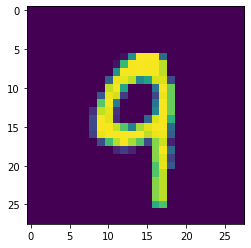

In [20]:
plt.imshow(test_images[1998].reshape(28,28))

y_predict = np.argmax(model.predict(test_images[1998].reshape(1,28,28,1)))
print('Giá trị dự đoán: ', y_predict)

In [19]:
model.save('model1.h5')

In [22]:
model2 = load_model('model1.h5')
label1 = model2.predict(test_images[10])

ValueError: ignored

Cifar10

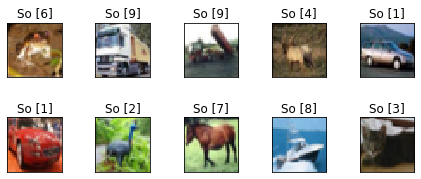

In [63]:
from keras.datasets import cifar10
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers import *
from keras.layers import Dense

(X_train, y_train), (X_test, y_test ) = cifar10.load_data()

for i in range(10):
  plt.subplot(3, 5, i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('So {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [65]:
model = Sequential()
model.add(Dense(512,input_shape = (32*32*3,), activation='relu', name = "Layer_1"))
model.add(Dense(256,input_shape = (32*32*3,), activation='relu', name = "Layer_2"))
model.add(Dense(128,input_shape = (32*32*3,), activation='relu', name = "Layer_3"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               1573376   
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
X_train = X_train.reshape((50000, 32*32*3))
X_trains = X_train.astype('float32')/255

X_test = X_test.reshape((10000, 32*32*3))
X_tests = X_test.astype('float32')/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [69]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_trains, y_train, epochs = 20, batch_size = 128)
test_loss, test_acc = model.evaluate(X_tests, y_test)
print('test accuracy', test_acc)
print('test loss', test_loss)

Epoch 1/20
391/391 [==============================] - 12s 29ms/step - loss: 1.3931 - accuracy: 0.5026
Epoch 2/20
391/391 [==============================] - 11s 28ms/step - loss: 1.3652 - accuracy: 0.5117
Epoch 3/20
391/391 [==============================] - 11s 27ms/step - loss: 1.3419 - accuracy: 0.5211
Epoch 4/20
391/391 [==============================] - 11s 28ms/step - loss: 1.3236 - accuracy: 0.5256
Epoch 5/20
391/391 [==============================] - 11s 27ms/step - loss: 1.3011 - accuracy: 0.5360
Epoch 6/20
391/391 [==============================] - 11s 27ms/step - loss: 1.2815 - accuracy: 0.5401
Epoch 7/20
391/391 [==============================] - 11s 27ms/step - loss: 1.2658 - accuracy: 0.5439
Epoch 8/20
391/391 [==============================] - 10s 26ms/step - loss: 1.2468 - accuracy: 0.5546
Epoch 9/20
391/391 [==============================] - 10s 27ms/step - loss: 1.2250 - accuracy: 0.5600
Epoch 10/20
391/391 [==============================] - 11s 27ms/step - loss: 1.207

1/1 [==============================] - 0s 63ms/step


array([3])

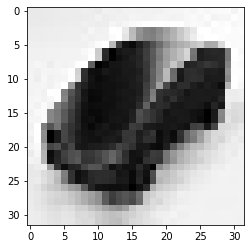

In [68]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('apple-car-automotor.jpg', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)